# How to Read, Write, Display Images in OpenCV and Converting Color Spaces

When working with images, some of the most basic operations that are essential to get a grip on include reading the images from disk, displaying them, accessing their pixel values, and converting them from one color space to another.

This tutorial explains these basic operations, starting first with a description of how a digital image is formulated in terms of its spatial coordinates and intensity values. 

In this tutorial, you will familiarise yourself with the most basic OpenCV operations that are essential when working with images. 

After completing this tutorial, you will know:

- How a digital image is formulated in terms of its spatial coordinates and intensity values. 
- How an image is read and displayed in OpenCV. 
- How an image’s pixel values can be accessed. 
- How an image may be converted from one color space to another. 

## Tutorial Overview

This tutorial is divided into three parts; they are:

- Formulation of an Image
- Reading and Displaying Images in OpenCV
- Converting Between Color Spaces

## Formulation of an Image

A digital image is made up of pixels, where each pixel is characterised by its *spatial coordinates* inside the image space, and its *intensity* or *gray level value*. 

Essentially, an image can be described by a 2D function, *I(x, y)*, where *x* and *y* denote the aforementioned spatial coordinates, and the value of *I* at any image position (*x, y*) denotes the pixel intensity. In a digital image, the spatial coordinates as well as the intensity values are all finite, discrete quantities. 

The type of digital image that we have just described is referred to as a *grayscale* image, and that is because it comprises a single channel where the pixel values carry only intensity information. The pixel intensities are commonly represented by integer values in the range [0, 255], which means that each pixel can take any of 256 discrete values. 

An RGB image, on the other hand, is composed of three channels, namely the *Red*, *Green* and *Blue*. 

The RGB colour model is not the only one in existence, but it is possibly the most commonly used in many computer vision applications. It is an additive colour model, which refers to the process of creating colour by mixing (or adding) the light spectra of differently coloured sources.

Since an RGB image is composed of three channels, then we need three functions to describe it: *$I_R(x, y)$, $I_G(x, y)$ and $I_B(x, y)$*, corresponding to the Red, Green and Blue channels, respectively. Consequently, in an RGB image each pixel value is expressed by a triplet of intensity values.

## Reading and Displaying Images in OpenCV

Let’s start by first importing the imread method from the OpenCV library in Python:

In [3]:
from cv2 import imread

Then proceed to read an RGB image. For this purpose, I have downloaded [this image](https://unsplash.com/photos/N04FIfHhv_k) and saved it to disk with the name, *Dog.jpg*, in a folder called, *Images*.

In [4]:
img = imread('Images/Dog.jpg')

The <code>imread</code> method returns a NumPy array, <code>img</code>, that contains the image pixel values. We can check out the array’s data type and dimensions as follows:

In [5]:
print('Datatype:', img.dtype, '\nDimensions:', img.shape)

Datatype: uint8 
Dimensions: (427, 640, 3)


The returned information tells us that the array is of data type uint8, which means that we are working with 8-bit unsigned integer values. This means that the pixels in each channel of the image can take any of 28 = 256 values, within a range from 0 to 255. This tallies exactly with the image formulation that we have reviewed above. We have also learned that the dimensions of the array are 427 × 640 × 3, which correspond to the number of image rows, columns and channels, respectively.

The image is a 3-dimensional NumPy array. Hence you can manipulate the array using NumPy syntax.

Let’s now try to access the values of the very first pixel situated at the upper left hand corner of the image. Keep in mind that arrays in Python are zero-indexed, and hence the coordinates of this pixel are (0, 0).

In [6]:
print(img[0, 0])

[173 185 233]


You may see from the output that, as expected, each pixel carries three values, one for each of the three channels that make up the image. We will discover to which specific channel each of these three values corresponds in the next section.

In [7]:
if img is not None:
    ...

Next we shall display the image using the Matplotlib package, as well as OpenCV’s <code>imshow</code> method. The latter takes as its first argument the name of the window that will contain the image, and the image to be displayed as its second argument. We will also be calling OpenCV’s <code>waitkey</code> function after the image is displayed, which waits for a keyboard event for a specified amount of milliseconds. If a value of 0 is, otherwise, provided as input, the <code>waitkey</code> function will wait indefinitely, allowing us to see the displayed window until a keyboard event is generated.

- Using Matplotlib:

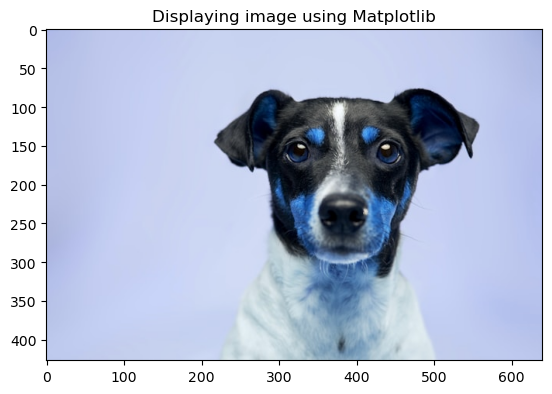

In [8]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.title('Displaying image using Matplotlib')
plt.show()

- Using OpenCV:

In [9]:
from cv2 import imshow, waitKey

imshow('Displaying image using OpenCV', img)
waitKey(0)

-1

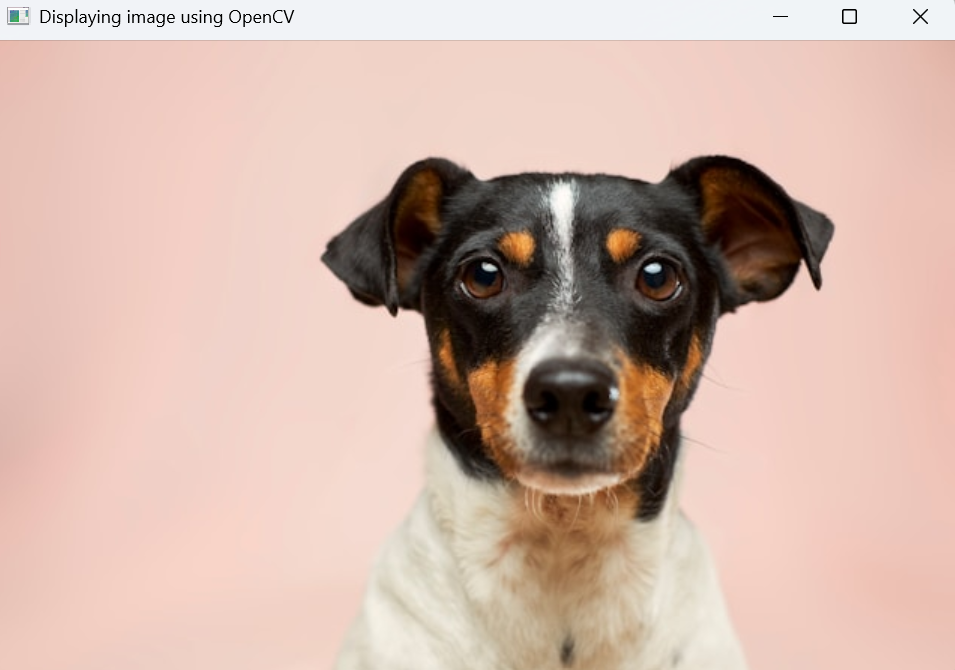

If you are surprised with the output produced by Matplotlib and are wondering how this happened, the reason for this is that OpenCV reads and displays the image in BGR rather than RGB order. 

Matplotlib, on the other hand, uses the RGB color format and, hence, requires that the BGR image is first converted to RGB before it can be displayed well. 

With OpenCV, you can also write a NumPy array as an image into a file, as follows:

In [10]:
from cv2 import imwrite
imwrite("output.jpg", img)

True

When you write an image with <code>imwrite()</code> function in OpenCV, you have to make sure the NumPy array is in the format that OpenCV expects, namely, it is a 3-dimensional array of uint8 in row × column × channel in BGR channel order.

## Converting Between Color Spaces

Conversion of an image from one color space to another can be achieved by means of OpenCV’s cvtColor method, which takes the source image as an input argument together with a color space conversion code. 

In order to convert between the BGR and RGB color spaces, we may use the following code:

In [11]:
from cv2 import cvtColor, COLOR_BGR2RGB

img_rgb = cvtColor(img, COLOR_BGR2RGB)

If we had to retry displaying the image using Matplotlib, we may now see that it is displayed correctly:

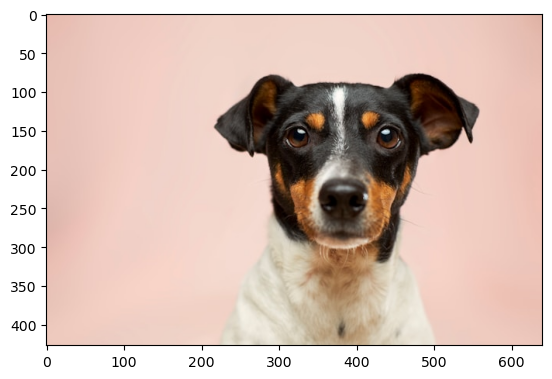

In [12]:
plt.imshow(img_rgb)
plt.show()

If we also had to access the values of the very first pixel of the newly converted RGB image:

In [13]:
print(img_rgb[0, 0])

[233 185 173]


and compare them to the values, [173 186 232], that we had printed earlier for the BGR image, we may notice the first and third values have now been swapped. What this tells us is that the order of the values, therefore, corresponds to the order of the image channels. 

BGR to RGB is not the only color conversion that may be achieved by this method. Indeed, there are many color space conversion codes to choose from, such as COLOR_RGB2HSV that converts between the RGB and the HSV (Hue, Saturation, Value) color spaces. 

Another popular conversion is from RGB to grayscale where, as we have mentioned earlier, the resulting output is expected to be a single channel image. Let’s try it out:

In [15]:
from cv2 import COLOR_RGB2GRAY

img_gray = cvtColor(img_rgb, COLOR_RGB2GRAY)

imshow('Grayscale Image', img_gray)
waitKey(0)

-1

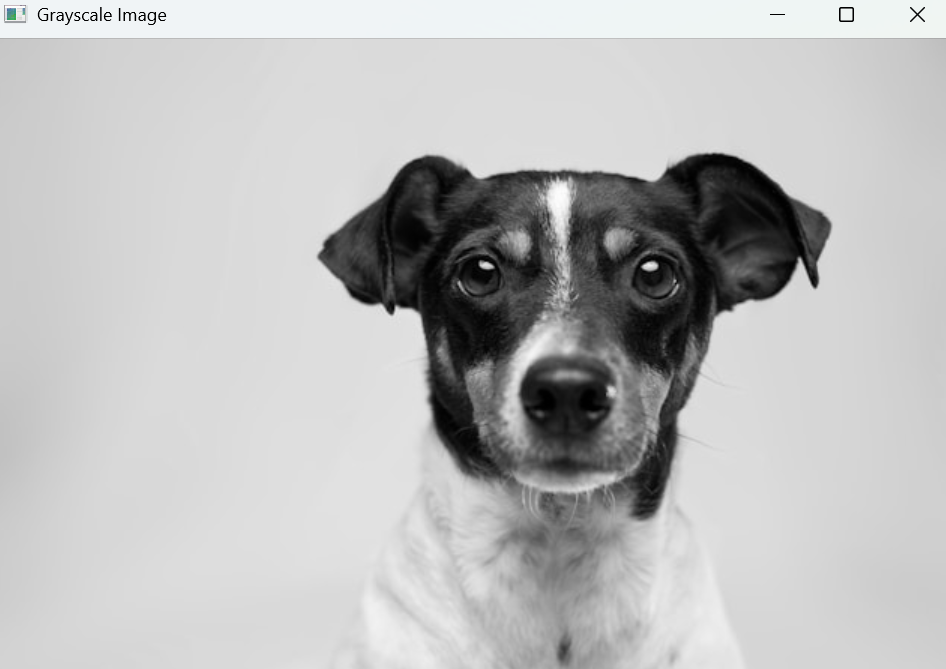

The conversion appears to have been carried out well, but let’s also try to access the value of the very first pixel at coordinates, (0, 0):

In [16]:
print(img_gray[0, 0])

198


As expected, only a single number is printed out that corresponds to the pixel’s intensity value. 

It is worth noting that this is not the only method by which the image may be converted to grayscale. Indeed, if we had to be working with an application that only requires the use of a grayscale (rather than an RGB) image, then we can also choose to read the image in grayscale straight away:

In [18]:
from cv2 import IMREAD_GRAYSCALE

img_gray = imread('Images/Dog.jpg', IMREAD_GRAYSCALE)

imshow('Grayscale Image', img_gray)
waitKey(0)

-1

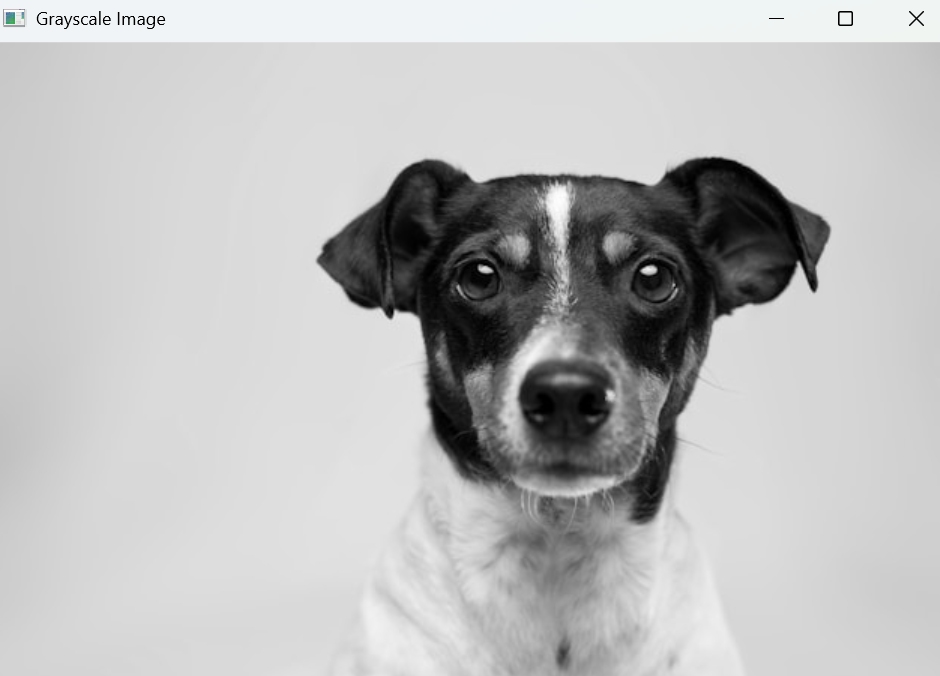

**NOTE**: The OpenCV documentation here warns that using <code>IMREAD_GRAYSCALE</code> will make use of the codec’s internal grayscale conversion when available, which may result in a different output to that of <code>cvtColor()</code>.

The <code>imread</code> method also supports several other flag values, two of which are <code>IMREAD_COLOR</code> and <code>IMREAD_UNCHANGED</code>. The <code>IMREAD_COLOR</code> flag is the default option that converts an image to BGR color, ignoring any transparency. The <code>IMREAD_UNCHANGED</code>, on the other hand, reads an image that may also include an alpha channel.  

## Summary

In this tutorial, you familiarised yourself with the most basic OpenCV operations that are essential when working with images. 

Specifically, you learned:

- How a digital image is formulated in terms of its spatial coordinates and intensity values. 
- How an image is read and displayed in OpenCV. 
- How an image’s pixel values can be accessed. 
- How an image may be converted from one color space to another.